<a href="https://colab.research.google.com/github/gabrielmprata/MVP_Sprint01_Puc_Rio/blob/main/MVP_Analise_de_Dados_e_boas_praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

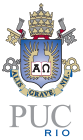 <font size="4"> **MVP de Análise de Dados e Boas Práticas**

---
>
**Pós-Graduação em Ciência de Dados e Analytics**
>
**Sprint 01**
>
**Aluno**: Gabriel Prata
>
**Data**: 29/03/2023
>
---

#**<font color=#FE8202> 1. Definição do problema**

A malha rodoviária é a principal forma de locomoção do país no que tange o deslocamento de pessoas, produtos, matérias primas, alimentos e combustível a curtas e longas distancias.
>
Este trabalho visa mostrar através dos dados abertos disponibilizados pela Polícia Rodoviária Federal, dentre os 70.000 Km de rodovias onde atua, o impacto dos acidentes de trânsito e sua letalidade nas rodovias federais, tendo como período analisado o ano de 2020.
>
O Brasil é o terceiro país com mais mortes no trânsito, ficando atrás apenas da Índia e da China segundo o relatório Global Status Report on Road Safety da Organização Mundial de Saúde (OMS). 
>
Cerca de 82% dos acidentes de trânsito nas rodovias federais brasileiras, são com vítimas, tendo em vista esse grande percentual de vítimas, nesse estudo, queremos entender os fatores que contribuem para os acidentes acontecerem. 
>
Esse estudo tem como objetivo geral analisar o estado físico dos envolvidos, classificando o acidente de trânsito em "com vítimas" ou "sem vítimas", fazendo uso de algoritmos de aprendizado de máquina supervisionado.
>
O dataset conta com 30 atributos relacionados a caracterização do acidente, 4 atributos que classifica o estado das vítimas em, ilesos, feridos leve, feridos grave e mortos, e 1 variavel que classifica o acidente em, sem vítimas, com vítmas feridas e com vitimas fatais. Essa ultima variavel utilizaremos com o alvo e as demais, serão analisadas para definir quias serão selecionadas como preditoras.


>**<font color=#FE8202> Dicionário de dados**

1.   **id**    -  Variável com valores numéricos, representando o identificador do acidente
2.   **pesid** - Variável com valores numéricos, representando o identificador da pessoa envolvida
3. **data_inversa** - Data da ocorrência no formato dd/mm/aaaa.
4. **dia_semana** - Dia da semana da ocorrência. Ex.: Segunda, terça, etc.
5. **horario** - Horário da ocorrência no formato hh:mm:ss.
6. **uf** - Unidade da Federação. Ex.: MG, SP, etc.
7. **br** - Variável com valores numéricos, representando o identificador da BR.
8. **km** - Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto.
9. **municipio** - Nome do município de ocorrência do acidente.
10. **causa_acidente** - Identificação da causa principal do acidente.
11. **tipo_acidente** - Identificação do tipo de acidente. Ex.: Colisão frontal, etc.
12. **classificação_acidente** - Classificação quanto à gravidade do acidente.
13. **fase_dia** - Fase do dia no momento do acidente. Ex.: Amanhecer, Pleno dia, etc.
14. **sentido_via** - Sentido da via considerando o ponto de colisão: Crescente e decrescente.
15. **Condição_meteorologica** - Condição meteorologica no momento do acidente. Ex.: Céu claro, chuva, etc.
16. **tipo_pista** - Tipo da pista considerando a quantidade de faixas: Dupla. simples ou múltipla.
17. **tracado_pista** - Descrição do traçãdo da via.
18. **usu_solo** - Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.
19. **id_veiculo** - Variável com valores numéricos, representando o identificador do veículo envolvido.
20. **tipo_veiculo** - Tipo do veículo conforme Art. 96 do CNT. Ex.: Automóvel, Caminhão, etc.
21. **marca** - Descrição da marca do veículo.
22. **ano_fabricacao_veiculo** - Ana de fabricação do veículo, formato aaaa.
23. **tipo_envolvido** - Tipo de envolvido no acidente conforme sua participação no evento. Ex.: condutor, passageiro, etc.
24. **estado_fisico** - Condição do envolvido conforme a gravidade das lesões.Ex.:morto,feridoleve,etc.
25. **idade** - Idade do envolvido. O código "-1" indica que não foi possivel coletar a informação.
26. **sexo** - Sexo do envolvido. O valor "invalido" indica que não foi possivel coletar a informação.
27. **ilesos** - Valor binário que identifica se o envolvido foi classificado como ileso.
28. **feridos_leves** - Valor binário que identifica se o envolvido foi classificado como ferido leve.
29. **feridos_graves** - Valor binário que identifica se o envolvido foi classificado como ferido grave.
30. **mortos** - Valor binário que identifica se o envolvido foi classificado como morto.
31. **latitude** - Latitude do local do acidente em formato geodésico decimal.
32. **longitude** - Longitude do local do acidente em formato geodésico decimal.
33. **regional** - Não definido no dicionário de dados fornecido pela PRF.
34. **delegacia** - Não definido no dicionário de dados fornecido pela PRF.
35. **uop** - Não definido no dicionário de dados fornecido pela PRF.

